In [1]:
from math import pi
import numpy
%matplotlib inline
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
ni=41
nj=41
xmin=0
xmax=1
ymin=0
ymax=1
e_target=2e-5
dx=(xmax-xmin)/(ni-1)
dy=(ymax-ymin)/(nj-1)
x=numpy.linspace(xmin,xmax,ni)
y=numpy.linspace(ymin,ymax,nj)
X,Y=numpy.meshgrid(x,y)
n=1
f=-2*(2*pi*n)**2*numpy.sin(2*pi*n*X)*numpy.sin(2*pi*n*Y)

In [3]:
def plot_3D(x, y, u):    
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,u[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$u$')
    ax.view_init(30,45)

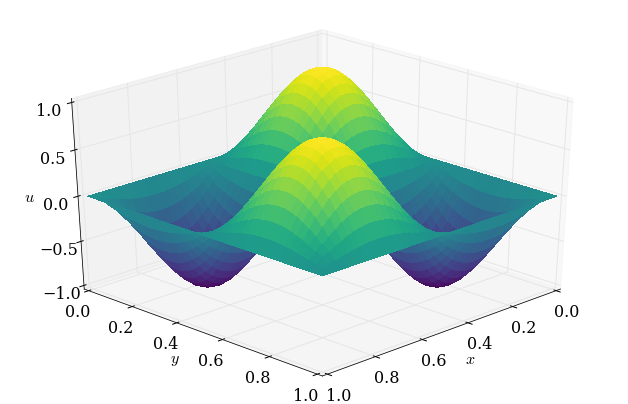

In [4]:
u_ex=numpy.sin(2*pi*n*X)*numpy.sin(2*pi*n*Y)
plot_3D(x,y,u_ex)

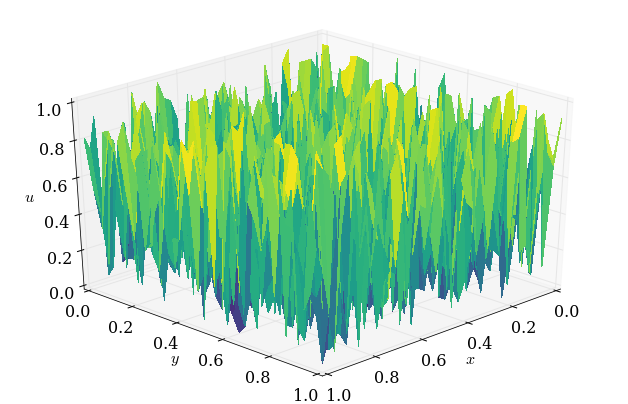

In [5]:
u0=numpy.random.random((nj,ni))
plot_3D(x,y,u0)

10000
3.33066907388e-16
0.00205870676455
2.82796008833e-12


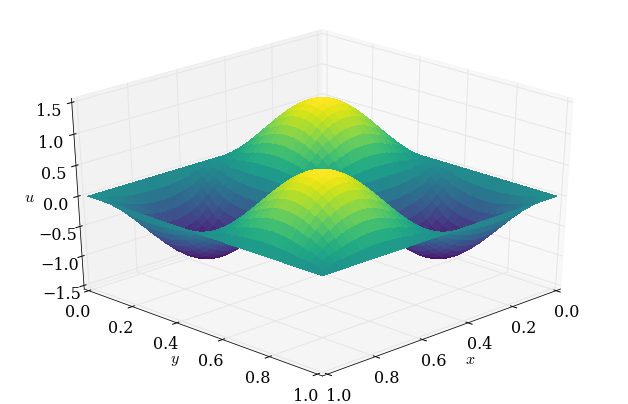

In [11]:
u=u0.copy()
dif=0
err=0
res=0

for iterations in range(10000):
    uold=u.copy()
    #for j in range(1,nj-1):
        #for i in range(1,ni-1):
            #u[j,i]=1/(2*(dx**2+dy**2))*((uold[j,i+1]+uold[j,i-1])*dy**2+\
                    #(uold[j+1,i]+uold[j-1,i])*dx**2-f[j,i]*dx**2*dy**2)
    
    u[1:-1,1:-1]=1/(2*(dx**2+dy**2))*((uold[1:-1,2:]+uold[1:-1,:-2])*dy**2+\
                 (uold[2:,1:-1]+uold[:-2,1:-1])*dx**2-f[1:-1,1:-1]*dx**2*dy**2)
    u[0,:]=0
    u[-1,:]=0
    u[:,0]=0
    u[:,-1]=0
    iterations+=1
    dif=numpy.max(numpy.abs(u-uold))
    err=numpy.max(numpy.abs(u-u_ex))
    res=numpy.max(numpy.abs(f[1:-1,1:-1]-\
                        ((u[1:-1,:-2]-2*u[1:-1,1:-1]+u[1:-1,2:])/dy**2)-\
                        (u[:-2,1:-1]-2*u[1:-1,1:-1]+u[2:,1:-1])/dx**2))
    
print(iterations)
print(dif)
print(err)
print(res)
plot_3D(x,y,u)

In [ ]:
u=u0.copy()
e_target=1e-7
e_norm=1

while e_norm>e_target:
    uold=u.copy()
    u[1:-1,1:-1]=1/(2*(dx**2+dy**2))*((uold[1:-1,2:]+uold[1:-1,:-2])*dy**2+\
                (uold[2:,1:-1]+uold[:-2,1:-1])*dx**2-f[1:-1,1:-1]*dx**2*dy**2)
    u[0,:]=0
    u[-1,:]=0
    u[:,0]=0
    u[:,-1]=0
    e_norm=numpy.sum((u-u_ex)**2)
    
print(e_norm)
plot_3D(x,y,u)

In [ ]:
uold=u.copy()
u[1:-1,1:-1]=1/(2*(dx**2+dy**2))*((uold[1:-1,2:]+uold[1:-1,:-2])*dy**2+\
            (uold[2:,1:-1]+uold[:-2,1:-1])*dx**2-f[1:-1,1:-1]*dx**2*dy**2)
u[0,1:-1]=0
u[-1,1:-1]=0
u[1:-1,0]=0
u[1:-1,-1]=0
e_norm=numpy.sum((u-u_ex)**2)
print(e_norm)
plot_3D(x,y,u)